In [1]:
import pandas as pd

## Reading the csv file 
interactions = pd.read_csv('customer_interactions.csv')
interactions.head()

,spend,interactions
0,5818,23
1,6255,15
2,6139,15
3,6070,19
4,4837,24


In [2]:
## Computing the z-scores
interactions['z_spend'] = (interactions['spend'] - interactions['spend'].mean()) / interactions['spend'].std()
interactions['z_interactions'] = (interactions['interactions'] - interactions['interactions'].mean()) / interactions['interactions'].std()
interactions.head()

,spend,interactions,z_spend,z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [3]:
from sklearn.cluster import KMeans

## Defining the k-means model
three_clusters = KMeans(n_clusters = 4, n_init = 20)

## Applying k-means to data 
iris_clusters = three_clusters.fit(interactions[['z_spend', 'z_interactions']])

## Extracting and appending the cluster labels
interactions['cluster'] = iris_clusters.labels_
interactions

,spend,interactions,z_spend,z_interactions,cluster
0,5818,23,0.923351,0.647282,3
1,6255,15,1.145958,-0.809740,0
2,6139,15,1.086868,-0.809740,0
3,6070,19,1.051719,-0.081229,0
4,4837,24,0.423632,0.829410,3
...,...,...,...,...,...
995,5117,27,0.566264,1.375794,3
996,5640,23,0.832678,0.647282,3
997,4766,23,0.387465,0.647282,3
998,1068,13,-1.496287,-1.173996,2


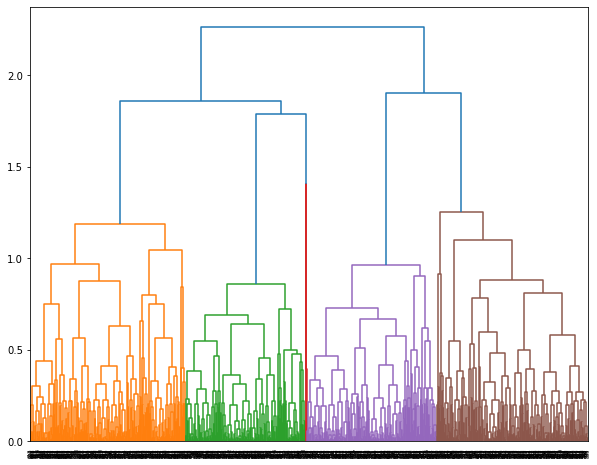

In [4]:
## Hirachical clustering 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy  as shc

plt.figure(figsize = (10, 8))

dend = shc.dendrogram(shc.linkage(interactions[['z_spend', 'z_interactions']], method = 'average'))

plt.show()